In [ ]:
import pandas as pd

# Load the uploaded Excel file
df=pd.read_csv("C:\\Users\\ACER\\Documents\\HRdata.csv")
print(df.head())
print(df.describe())


                       Name  Age       Degree  Year of Joining  \
0                   ARJUN R   28           BA             2006   
1  SUNIL CHERUVATHOOR SUNNY   42        B.com             2015   
2              ARJUN SANKAR   51          Bsc             2006   
3                 RINOY LAL   50  B.com M.com             2008   
4                ANGEL JOSE   34        B.com             2008   

   Degree Percentage  experience Department  Salary  
0                 63           8  Marketing   18000  
1                 58          22    Finance   52000  
2                 75          31  Marketing   91000  
3                 60          30    Finance   50000  
4                 71          14  Marketing   24000  
             Age  Year of Joining  Degree Percentage  experience        Salary
count  60.000000        60.000000          60.000000   60.000000     60.000000
mean   34.850000      2006.550000          65.083333   14.850000  34266.666667
std     9.902619         5.173023         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               60 non-null     object
 1   Age                60 non-null     int64 
 2   Degree             60 non-null     object
 3   Year of Joining    60 non-null     int64 
 4   Degree Percentage  60 non-null     int64 
 5   experience         60 non-null     int64 
 6   Department         60 non-null     object
 7   Salary             60 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.9+ KB


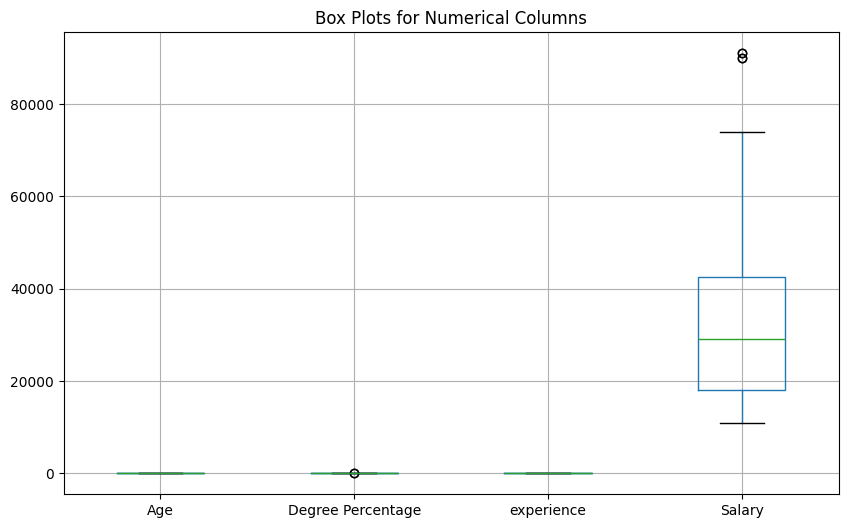

In [9]:
import matplotlib.pyplot as plt

df[['Age', 'Degree Percentage', 'experience', 'Salary']].boxplot(figsize=(10, 6))
plt.title('Box Plots for Numerical Columns')
plt.show()

In [10]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler

current_year = datetime.now().year
df['Years with Company'] = current_year - df['Year of Joining']

df = pd.get_dummies(df, columns=['Degree', 'Department'], drop_first=True)

scaler = StandardScaler()
numerical_cols = ['Age', 'Degree Percentage', 'experience', 'Salary', 'Years with Company']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


                       Name       Age  Year of Joining  Degree Percentage  \
0                   ARJUN R -0.697574             2006          -0.261009   
1  SUNIL CHERUVATHOOR SUNNY  0.728124             2015          -0.887431   
2              ARJUN SANKAR  1.644645             2006           1.242404   
3                 RINOY LAL  1.542809             2008          -0.636863   
4                ANGEL JOSE -0.086560             2008           0.741266   

   experience    Salary  Years with Company  Degree_B.com  Degree_B.com M.com  \
0   -0.697574 -0.799306            0.107218         False               False   
1    0.728124  0.871375           -1.647259          True               False   
2    1.644645  2.787745            0.107218         False               False   
3    1.542809  0.773100           -0.282666         False                True   
4   -0.086560 -0.504480           -0.282666          True               False   

   Degree_B.com MBA  ...  Degree_MSW  Degree_PDC  

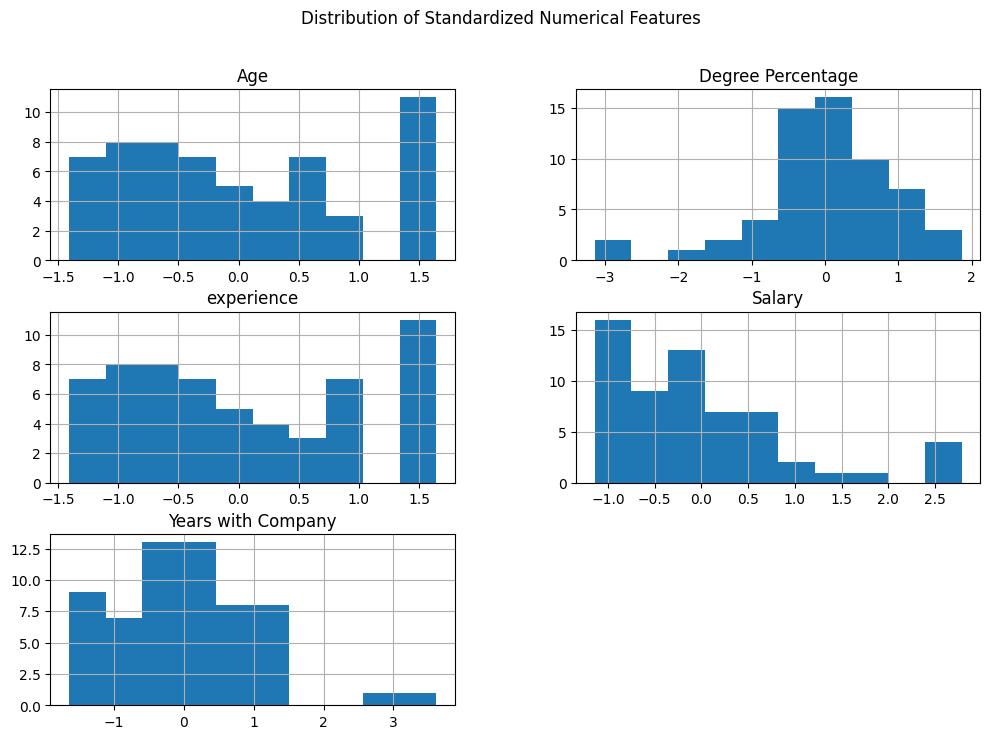

In [11]:
import matplotlib.pyplot as plt

df[['Age', 'Degree Percentage', 'experience', 'Salary', 'Years with Company']].hist(bins=10, figsize=(12, 8))
plt.suptitle('Distribution of Standardized Numerical Features')
plt.show()


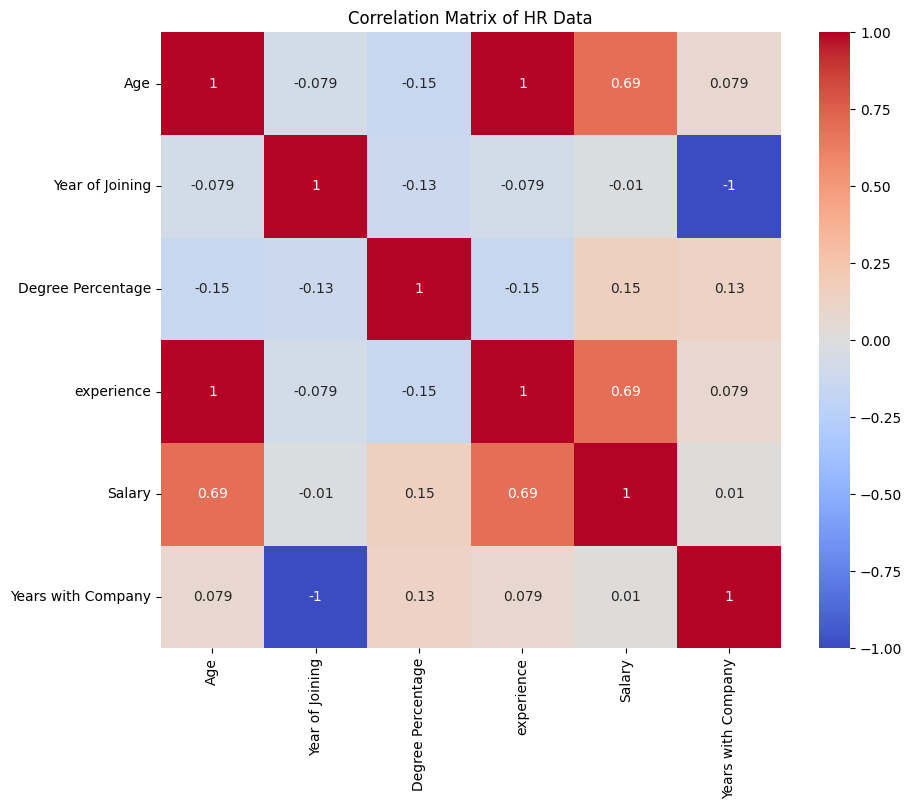

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of HR Data')
plt.show()



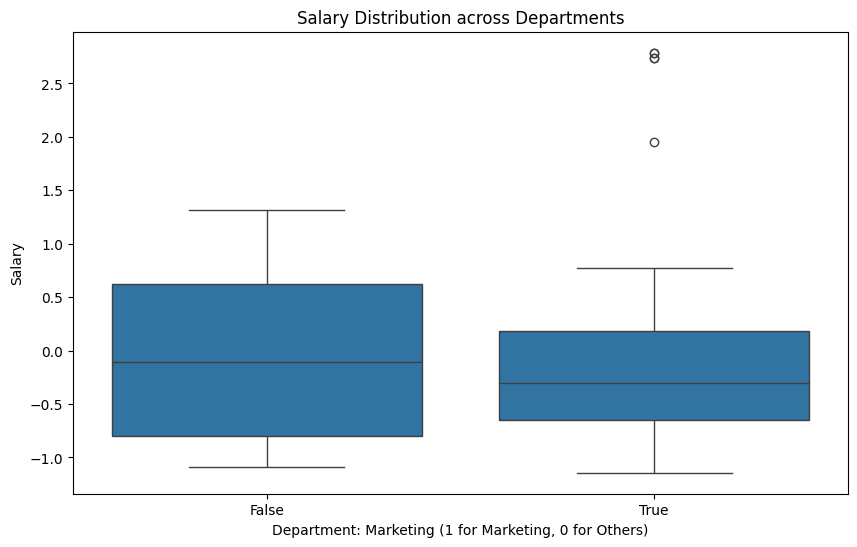

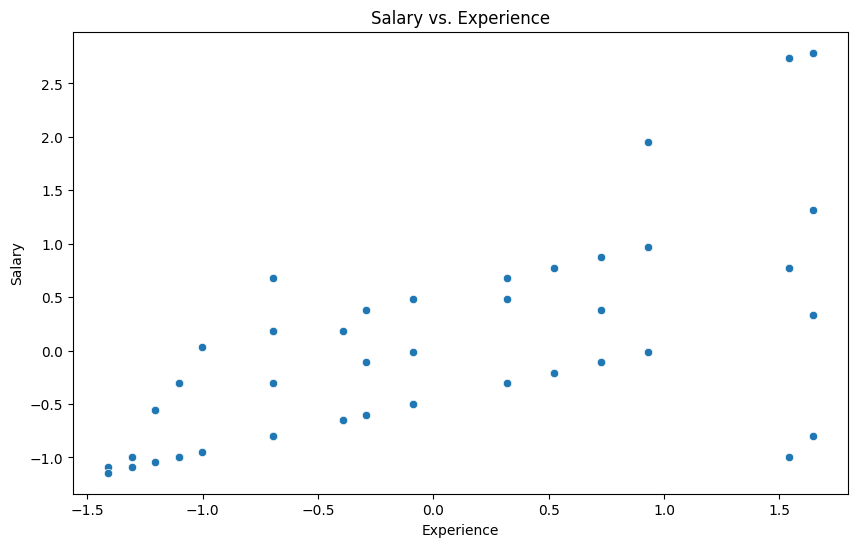

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department_Marketing', y='Salary')
plt.title('Salary Distribution across Departments')
plt.xlabel('Department: Marketing (1 for Marketing, 0 for Others)')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='experience', y='Salary')
plt.title('Salary vs. Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [17]:
from scipy.stats import ttest_ind, pearsonr

marketing_salary = df[df['Department_Marketing'] == 1]['Salary']
non_marketing_salary = df[df['Department_Marketing'] == 0]['Salary']
t_stat, p_val = ttest_ind(marketing_salary, non_marketing_salary)
print(f"T-test for Salary Difference (Marketing vs Non-Marketing): t-statistic = {t_stat}, p-value = {p_val}")

corr, p_corr = pearsonr(df['experience'], df['Salary'])
print(f"Pearson Correlation between Experience and Salary: correlation = {corr}, p-value = {p_corr}")


T-test for Salary Difference (Marketing vs Non-Marketing): t-statistic = 0.4404206245488988, p-value = 0.6612695858629964
Pearson Correlation between Experience and Salary: correlation = 0.6884122112881204, p-value = 1.2120179192169368e-09


- Academic scores aren’t affecting salary much so skills or other things are probably mattering more

- Salary is going up with experience but is growing slower after a certain point so the biggest increases are happening in the early years

- People with the same experience aren’t always getting the same salary so experience isn’t the only thing that’s affecting pay

- Salaries in non-Marketing jobs are showing more variation which could mean there are more types of roles outside Marketing

- Older employees are having more experience which is naturally leading to higher pay on average

- Most people aren’t staying for many years here so there might be opportunities to focus on retention
